In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Use `pandas` to Read in Data Files

#### The `stars_and_blends.csv` file contains a truth label and image data for thousands of images.<br><br>The first column is the label, while the following 100 columns are the image data. These 100 values correspond to the flux values for 100 pixels (which make up a 10 x 10 pixel image. Examples plotted below). <br><br>A label of `0` corresponds to a single star, while a label of `1` corresponds to a stellar blend (including both line-of-sight blends and stellar binaries. See the `stellar_blend_classification.pdf` for more info on the differences between the two classes).

In [2]:
# Read in the csv file with the labels and image data
data = pd.read_csv('stars_and_blends.csv')

In [3]:
# Display the data
display(data)

,idx,class,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,...,pixel_90,pixel_91,pixel_92,pixel_93,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99
0,0,1,156.62683,141.30438,136.21732,146.54047,150.17270,135.53459,141.97180,139.92653,...,140.15384,134.55984,143.89368,150.54286,149.14265,137.10670,143.20221,145.33527,140.46939,139.58698
1,1,1,309.13373,292.06790,305.17847,288.71683,316.50340,308.41750,293.07590,296.23193,...,309.93723,306.52902,297.93060,320.67480,301.06464,321.33676,316.21960,306.92670,297.75546,295.51550
2,2,1,1812.00230,1829.71450,1806.07740,1794.05330,1857.23010,1826.03250,1806.68590,1831.20650,...,1833.05290,1833.73330,1832.28120,1806.10200,1829.93550,1809.85270,1812.51040,1812.95350,1838.17610,1835.88650
3,3,1,203.30963,213.02747,191.45403,187.97757,186.48967,177.51888,187.33359,192.73975,...,173.28897,186.48457,182.05667,181.87524,186.29561,180.80054,189.26610,186.32065,181.04028,178.88576
4,4,1,743.40130,780.95410,782.53060,804.43820,770.77670,790.73486,786.76380,775.35690,...,774.54620,808.75867,780.27344,797.94354,766.98737,793.65344,784.77690,772.65643,785.46120,780.04126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,27248,1,394.08970,403.50412,389.89755,383.93036,394.21670,402.08066,393.66623,398.47275,...,396.45642,387.94537,378.71274,394.62936,378.51350,406.36500,393.15625,390.90850,391.80804,401.58475
27249,27249,1,226.75377,216.44025,222.85257,231.12956,215.93462,224.14360,228.36986,231.16632,...,297.18417,477.68674,346.34750,270.67673,229.96810,236.23915,219.13628,225.17914,227.78926,214.09967
27250,27250,1,864.24320,825.41110,852.45600,844.61800,852.75360,850.32490,861.16560,830.34490,...,838.21640,830.75964,857.13990,858.10846,849.03000,860.69740,870.15027,839.08530,837.25750,829.34973
27251,27251,1,282.39905,282.79000,287.21704,283.29373,278.90573,275.18408,282.07568,284.10583,...,278.31200,280.43738,280.36392,283.70905,277.36540,273.26470,288.52817,278.70825,275.76572,272.38385


In [4]:
# Get the label data
label = data['class']

# Use .iloc to locate the image data within the DataFrame
image_data = data.iloc[:, 2:]

In [5]:
print("There are "+str(len(data[data['class']==0]))+' single stars in the dataset')
print("There are "+str(len(data[data['class']==1]))+' blended stars in the dataset')

There are 15110 single stars in the dataset
There are 12143 blended stars in the dataset


## Plot Images

#### Sometimes it is helpful to visualize an image you are working with, instead of staring at an array of flux values. Use the following code to plot an image. (The number in the brackets after iloc is the row in data that you are plotting).
Note: The images plotted in this notebook have no normalization applied to them. Once you normalize the data, try plotting again and see how the image has changed!

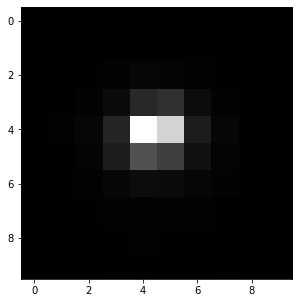

In [6]:
fig = plt.figure(figsize=(5,5))
plt.imshow(image_data.iloc[0].values.reshape(10,10), cmap='gray')
plt.show()

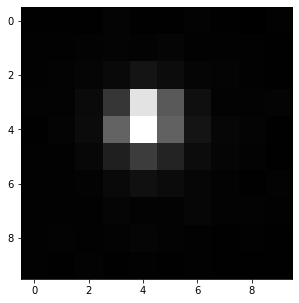

In [7]:
fig = plt.figure(figsize=(5,5))
plt.imshow(image_data.iloc[28].values.reshape(10,10), cmap='gray')
plt.show()

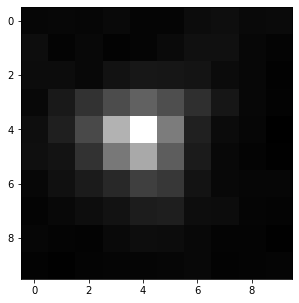

In [8]:
fig = plt.figure(figsize=(5,5))
plt.imshow(image_data.iloc[3282].values.reshape(10,10), cmap='gray')
plt.show()

## Optional: Additional Challenge

#### If you would like an additional challenge beyond the binary classification task (single stars vs. stellar blends), you can add a third class using the  `binary_indexes.csv` file.<br><br>This file lists the indexes from the `stars_and_blends.csv` file where there are binary stars. Here is an example of how to use this file:

In [9]:
# Read in the binary index file
binary_idx = pd.read_csv('additional_binary_class_indexes.csv')

# Make a copy of the original data, so that we don't overwrite it
data2 = data.copy()

# Loop over every index that is a binary star
for idx in binary_idx['index']:
    # Set the new class label to 2
    data2.at[idx, 'class'] = 2

# Save the data to a new file
data2.to_csv('data_with_binaries.csv', index=False)

In [10]:
data2

,idx,class,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,...,pixel_90,pixel_91,pixel_92,pixel_93,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99
0,0,1,156.62683,141.30438,136.21732,146.54047,150.17270,135.53459,141.97180,139.92653,...,140.15384,134.55984,143.89368,150.54286,149.14265,137.10670,143.20221,145.33527,140.46939,139.58698
1,1,1,309.13373,292.06790,305.17847,288.71683,316.50340,308.41750,293.07590,296.23193,...,309.93723,306.52902,297.93060,320.67480,301.06464,321.33676,316.21960,306.92670,297.75546,295.51550
2,2,1,1812.00230,1829.71450,1806.07740,1794.05330,1857.23010,1826.03250,1806.68590,1831.20650,...,1833.05290,1833.73330,1832.28120,1806.10200,1829.93550,1809.85270,1812.51040,1812.95350,1838.17610,1835.88650
3,3,1,203.30963,213.02747,191.45403,187.97757,186.48967,177.51888,187.33359,192.73975,...,173.28897,186.48457,182.05667,181.87524,186.29561,180.80054,189.26610,186.32065,181.04028,178.88576
4,4,1,743.40130,780.95410,782.53060,804.43820,770.77670,790.73486,786.76380,775.35690,...,774.54620,808.75867,780.27344,797.94354,766.98737,793.65344,784.77690,772.65643,785.46120,780.04126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,27248,2,394.08970,403.50412,389.89755,383.93036,394.21670,402.08066,393.66623,398.47275,...,396.45642,387.94537,378.71274,394.62936,378.51350,406.36500,393.15625,390.90850,391.80804,401.58475
27249,27249,2,226.75377,216.44025,222.85257,231.12956,215.93462,224.14360,228.36986,231.16632,...,297.18417,477.68674,346.34750,270.67673,229.96810,236.23915,219.13628,225.17914,227.78926,214.09967
27250,27250,2,864.24320,825.41110,852.45600,844.61800,852.75360,850.32490,861.16560,830.34490,...,838.21640,830.75964,857.13990,858.10846,849.03000,860.69740,870.15027,839.08530,837.25750,829.34973
27251,27251,2,282.39905,282.79000,287.21704,283.29373,278.90573,275.18408,282.07568,284.10583,...,278.31200,280.43738,280.36392,283.70905,277.36540,273.26470,288.52817,278.70825,275.76572,272.38385


In [11]:
print("There are "+str(len(data2[data2['class']==0]))+' single stars in the dataset')
print("There are "+str(len(data2[data2['class']==1]))+' blended stars in the dataset')
print("There are "+str(len(data2[data2['class']==2]))+' binary stars in the dataset')

There are 15110 single stars in the dataset
There are 7414 blended stars in the dataset
There are 4729 binary stars in the dataset


#### This new dataset has three labels. A label of `0` corresponds to single stars, `1` corresponds to stellar blends that are NOT binaries (line-of-sight overlap only), and `2` corresponds to stellar binaries. 

## Plotted Examples of All Three Classes

Note: Again, try normalizing your data and see how this changes!

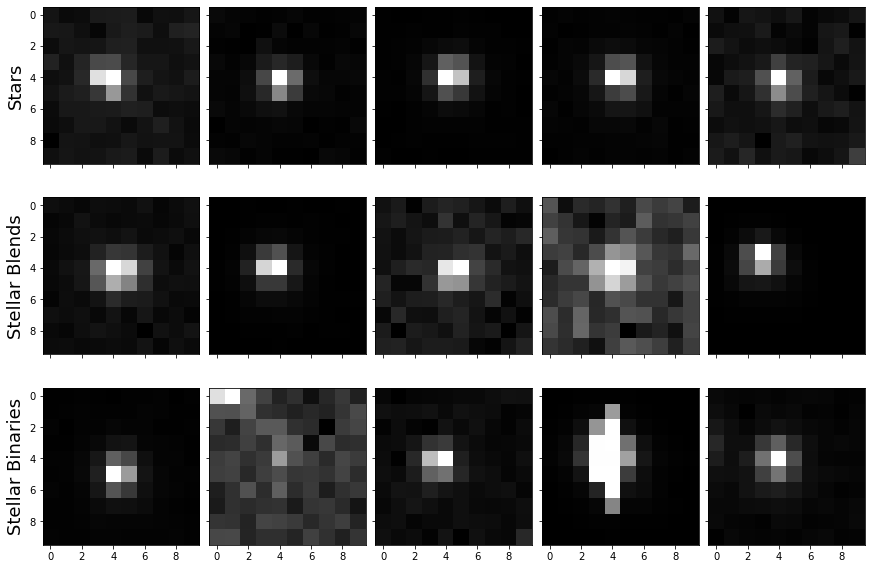

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True, constrained_layout=True, figsize=(12, 8))

for idx in range(0, 5):
    star = data2[data2['class']==0].sample(n=1, random_state=idx)
    star_image = star.iloc[:, 2:].values.reshape(10,10)
    axes[0,idx].imshow(star_image, cmap='gray')
    axes[0,0].set_ylabel("Stars", fontsize=18) 
    
    blend = data2[data2['class']==1].sample(n=1, random_state=idx)
    blend_image = blend.iloc[:, 2:].values.reshape(10,10)
    axes[1,idx].imshow(blend_image, cmap='gray')
    axes[1,0].set_ylabel("Stellar Blends", fontsize=18) 
    
    binary = data2[data2['class']==2].sample(n=1, random_state=idx)
    binary_image = binary.iloc[:, 2:].values.reshape(10,10)
    axes[2,idx].imshow(binary_image, cmap='gray')
    axes[2,0].set_ylabel("Stellar Binaries", fontsize=18) 
    
plt.show()

## Additional Information and References

- Single stars and stellar blends (non-binary) were determined by making cuts on a subset of data from the Legacy survey: 
    - https://www.legacysurvey.org
    - https://www.legacysurvey.org/dr7/files/#sweep-catalogs
- To determine single stars vs. stellar blends, cuts are made on various catalog values (such as checking the distance between any two stars in the catalog), then, to guarantee that these object will be visible in ZTF images, we make cuts on magnitude corresponding to magnitude limits from the ZTF survey. 
- The binary star class was determined using the binary catalog given in this work:
    - https://iopscience.iop.org/article/10.3847/1538-3881/ab5865
    - https://www.fzu.cz/~piska/Catalogue/
- Note: Due to the nature of astronomical cataloging (and error therein), the way the binaries were labeled, etc. there is a chance that a small number of objects may be mislabeled. However, this small amount should not affect the overall outcome of the classification task. Some cutouts may cut off one of the stars in the blend, or there may be a bright star nearby that is not part of the blend, that overpowers the source star of interest. These are real challenges with astronomical classification and remain inside the dataset.
- The data associated with each image in the dataset was then made by querying data from the Zwicky Transient Facility (ZTF):
    - https://www.ztf.caltech.edu
    - https://irsa.ipac.caltech.edu/Missions/ztf.html
- All images are ZTF i-band images, which is a telescope filter corresponding to the ~700-900nm range. This means that each image only contains emissions from the object(s) in those wavelength ranges. 
    - See Figure 2 from: https://iopscience.iop.org/article/10.1088/1538-3873/aaecbe/pdf